#Task 1

Write a function that takes a grayscale image as argument and generates the histogram of that grayscale image. You can use any suitable grayscale image from here: https://www.imageprocessingplace.com/DIP-3E/dip3e_book_images_downloads.htm

In [107]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [108]:
def my_histogram(image, title="Image Histogram"):

    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    hist, bins = np.histogram(image.flatten(), 256, [0, 256])

    plt.figure(figsize=(8, 4))
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.bar(range(256), hist, width=1, color='black')
    plt.xlim([0, 255])
    plt.grid(alpha=0.3)
    plt.show()


# Task 2
Take any suitable color image and divide it into 3 separate channels. Display the individual channels in their own color. For example, the red channel should generate a red image, where the intensity of red in each pixel will depend on how much red is present in that pixel in the original color image

In [109]:
def channel_show(color_image):
    b, g, r = cv2.split(color_image)

    zeros = np.zeros_like(b)

    blue_img  = cv2.merge([b, zeros, zeros])
    green_img = cv2.merge([zeros, g, zeros])
    red_img   = cv2.merge([zeros, zeros, r])

    cv2_imshow(blue_img);  print("Blue Channel")
    cv2_imshow(green_img); print("Green Channel")
    cv2_imshow(red_img);   print("Red Channel")

    return b, g, r


# Task 3

Use your previously written histogram function from Task 1 to generate the histogram of color image. Since color images have 3 channels, so you will have 3 histograms. Analyze the histograms to determine which color is more dominant in the image.


In [110]:
def color_histogram(color_image):
    b, g, r = channel_show(color_image)

    my_histogram(r, "Red Channel Histogram")
    my_histogram(g, "Green Channel Histogram")
    my_histogram(b, "Blue Channel Histogram")


# Task 4

Write a function that takes 3 parameters: a color image, a channel_number (0 for red, 1 for green and 2 for blue) and an enhancement value between 0 and 1, and returns an enhanced version of the image. Show the enhanced image. As an example, refer to the following image which shows the result for red enhancement.
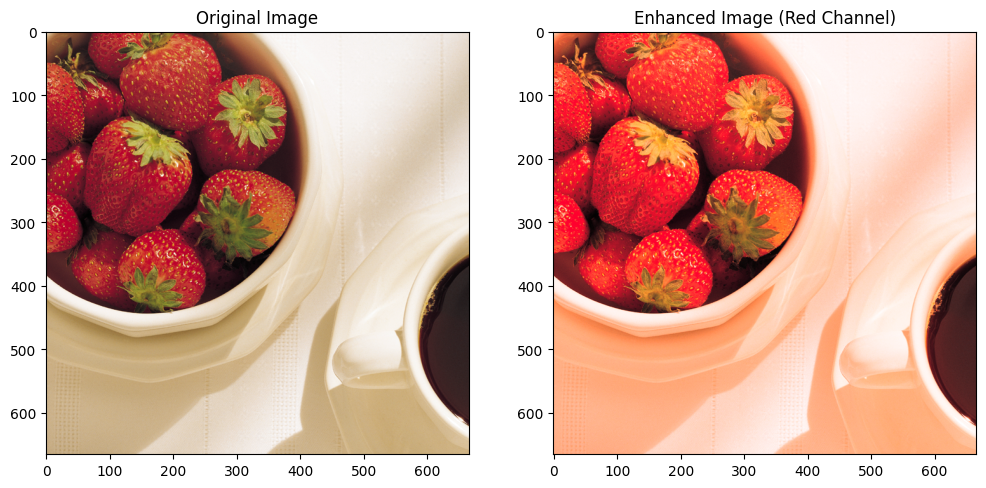

In [111]:
def color_enhance(color_image, channel_number, enhancement_val):
    # Map: user RGB → OpenCV BGR index
    channel_map = {0: 2, 1: 1, 2: 0}
    ocv_channel = channel_map[channel_number]

    # Split into BGR
    b, g, r = cv2.split(color_image)
    channels = [b, g, r]

    factor = 1 + enhancement_val

    enhanced_channel = np.clip(channels[ocv_channel] * factor,
                               0, 255).astype("uint8")
    channels[ocv_channel] = enhanced_channel

    enhanced_img = cv2.merge(channels)

    cv2_imshow(enhanced_img)
    print(f"Enhanced channel: {['Red','Green','Blue'][channel_number]}")

    return enhanced_img


#Task 5

Write a function that takes a grayscale image as argument and returns the negative of that image. For an 8-bit image, it follows:

$$g(x,y) = L_{max} - f(x,y);$$
where $L_{max}=255$

In [112]:
def grayscale_negative(gray_img):
    Lmax = 255
    negative_img = Lmax - gray_img
    cv2_imshow(negative_img)
    return negative_img


#Task 6

Extend your function so that it works for color images too.

In [113]:
def invert_color(color_image):
    negative_img = 255 - color_image
    cv2_imshow(negative_img)
    return negative_img


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('cat.jpg')
M = np.asarray(img)

#print(M)
img
#plt.imshow(img, cmap='gray')
#plt.imshow(M, cmap='gray')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

cat_img = cv2.imread("/content/cat3.jpg")
cv2_imshow(cat_img)

grayimg = cv2.cvtColor(cat_img, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayimg)

# Serves the same purpose
# img = cv2.imread("/content/cat.jpg", cv2.IMREAD_GRAYSCALE)
# cv2_imshow(img)

# Converts from BGR to RGB
img2 = cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB)
cv2_imshow(img2)

# pyplot displays in RGB format
plt.imshow(img2)



In [ ]:
print("Task 1: Grayscale Histogram")
my_histogram(grayimg)

print("Task 2: Color Channels")
b, g, r = channel_show(cat_img)

print("Task 3: Color Histograms")
color_histogram(cat_img)

print("Task 4: Color Enhancement (Red +50%)")
enhanced_img = color_enhance(cat_img, 0, 0.5)

print("Task 5: Grayscale Negative")
negative_gray = grayscale_negative(grayimg)

print("Task 6: Color Negative")
negative_color = invert_color(cat_img)
